In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'planck_wgt_flux',
            'fac_meank']


def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd',
                          'LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'co2',
                          'band03b_wn_620_720',
                          'ng_7',
                          'g_descending',
                          'refPTs_P_1_T_250__P_10_T_250',
                          'ng_refs_5__2',
                          'getabsth_auto__auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform__dlogN_uniform',
                          'wgt_all.5__all.5',
                          'bigsum',
                          'mdc_0501_792d11',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd',
                          'LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'co2',
                          'band03b_wn_620_720',
                          'ng_7',
                          'g_descending',
                          'refPTs_P_1_T_250__P_10_T_250',
                          'ng_refs_5__2',
                          'getabsth_auto__auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform__dlogN_uniform',
                          'wgt_all.5__all.5',
                          'bigsum',
                          'mdc_0501_792d11',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 7 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
# print some input parameters

with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 620

nband = 100

nv = 200

dv = 0.005

tsfc = 294.0

ng = 7

nref = 2

p_refs = (/ 1,  10 /)

t_refs = (/ 250, 250 /)

ng_refs = (/ 5,   2 /)

data wgt
     &     /7 * .5/

planck_wgt_flux = 2

include 'mls75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [16]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: flux, cooling rate g-group 1

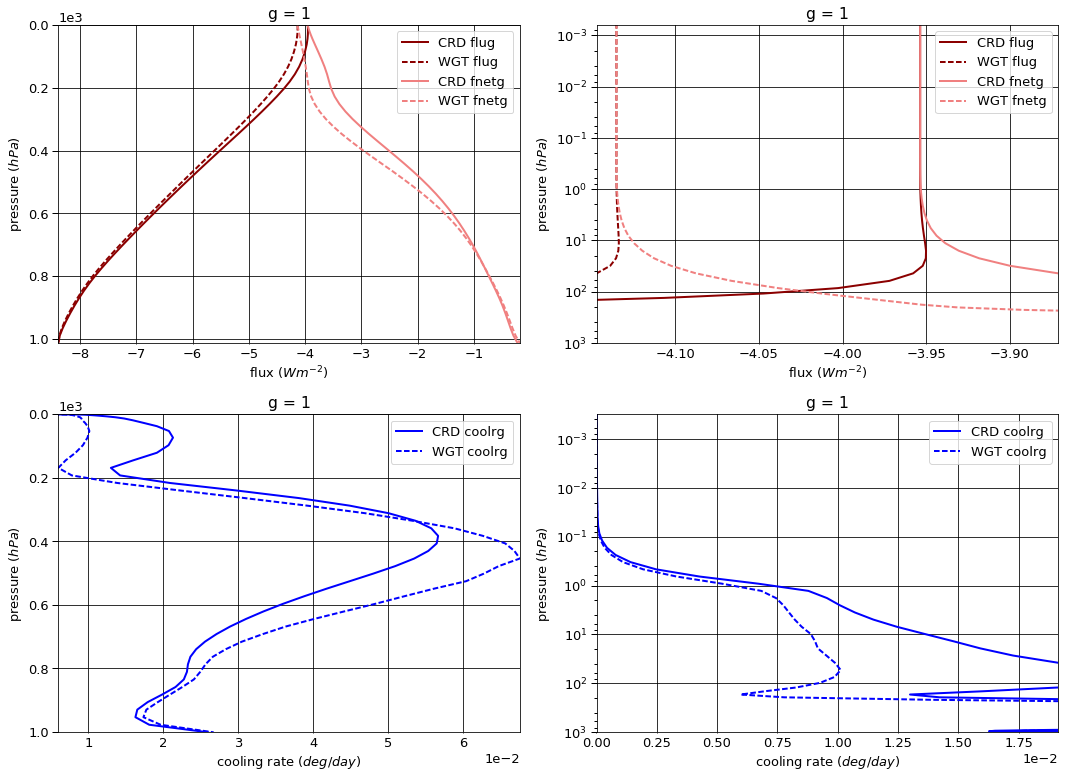

# Figure: flux, cooling rate g-group 2

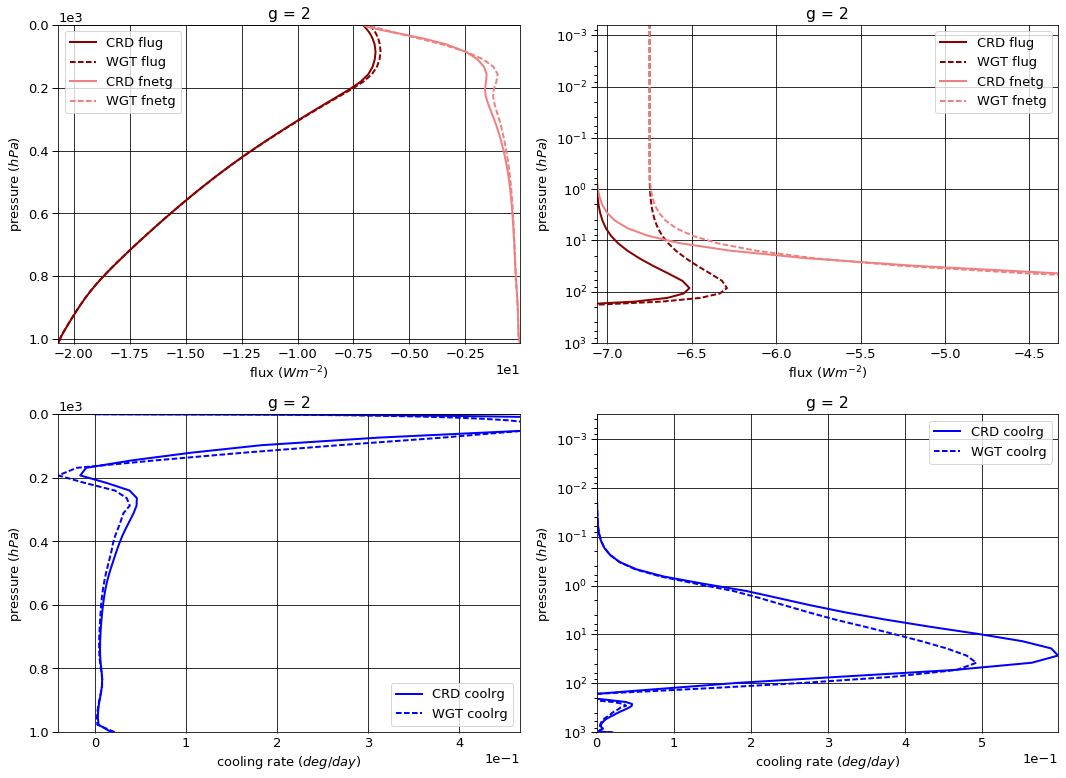

# Figure: flux, cooling rate g-group 3

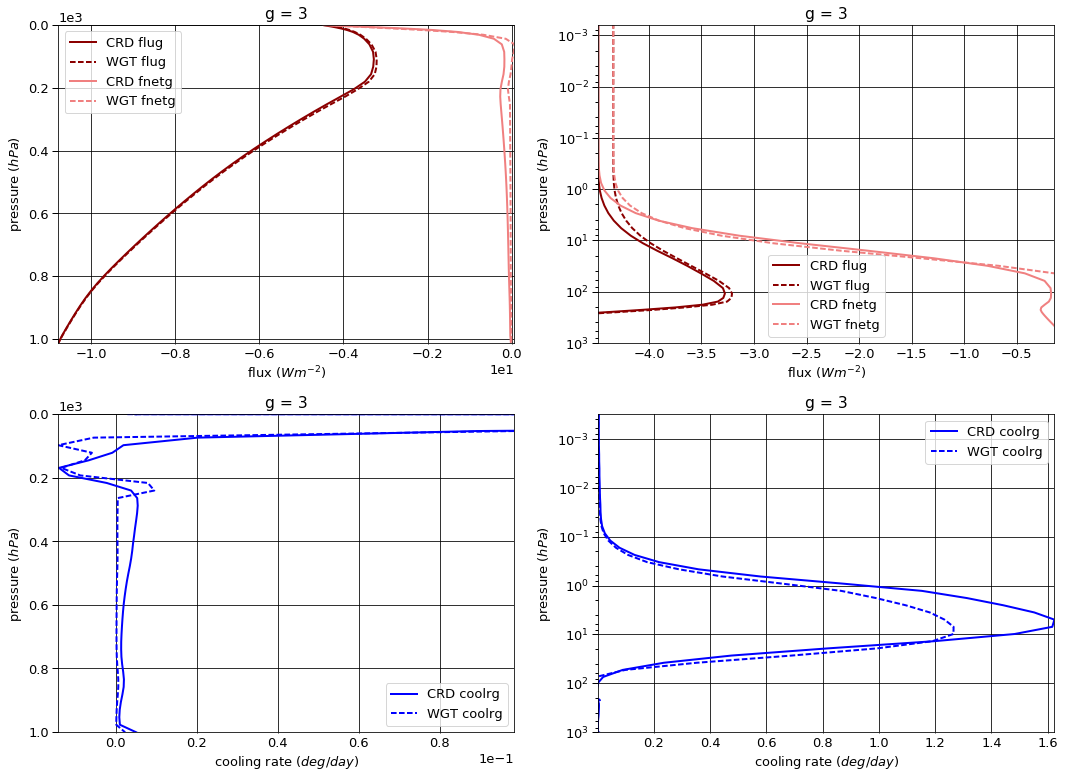

# Figure: flux, cooling rate g-group 4

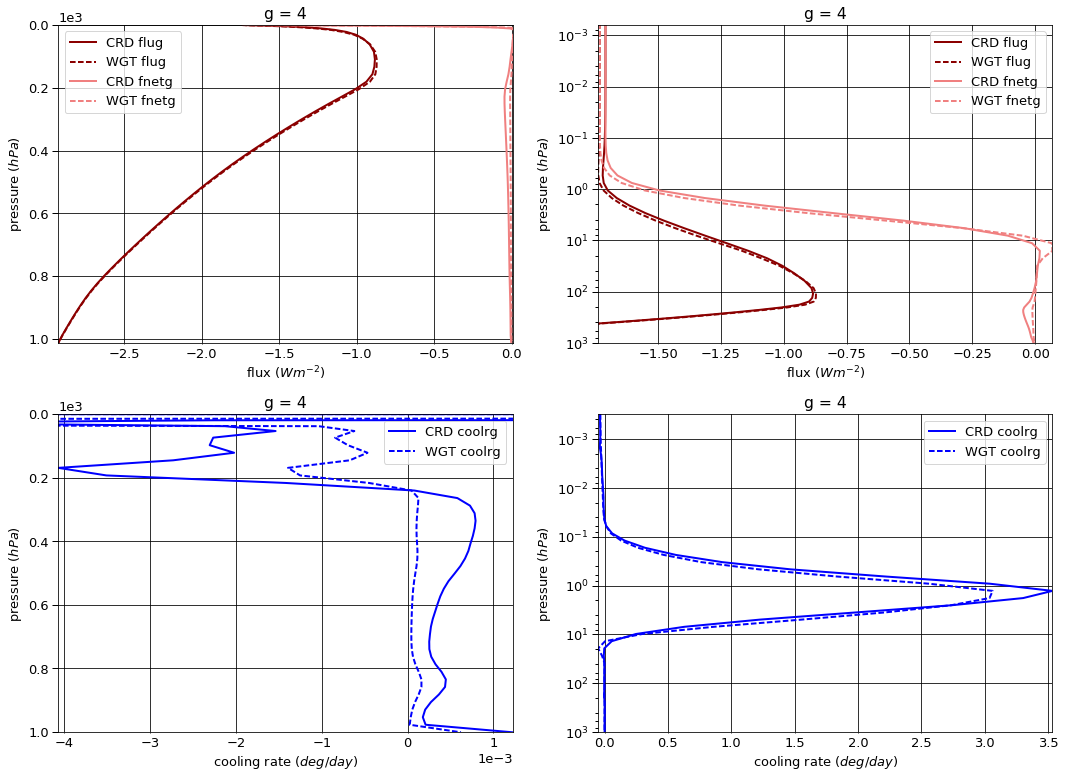

# Figure: flux, cooling rate g-group 5

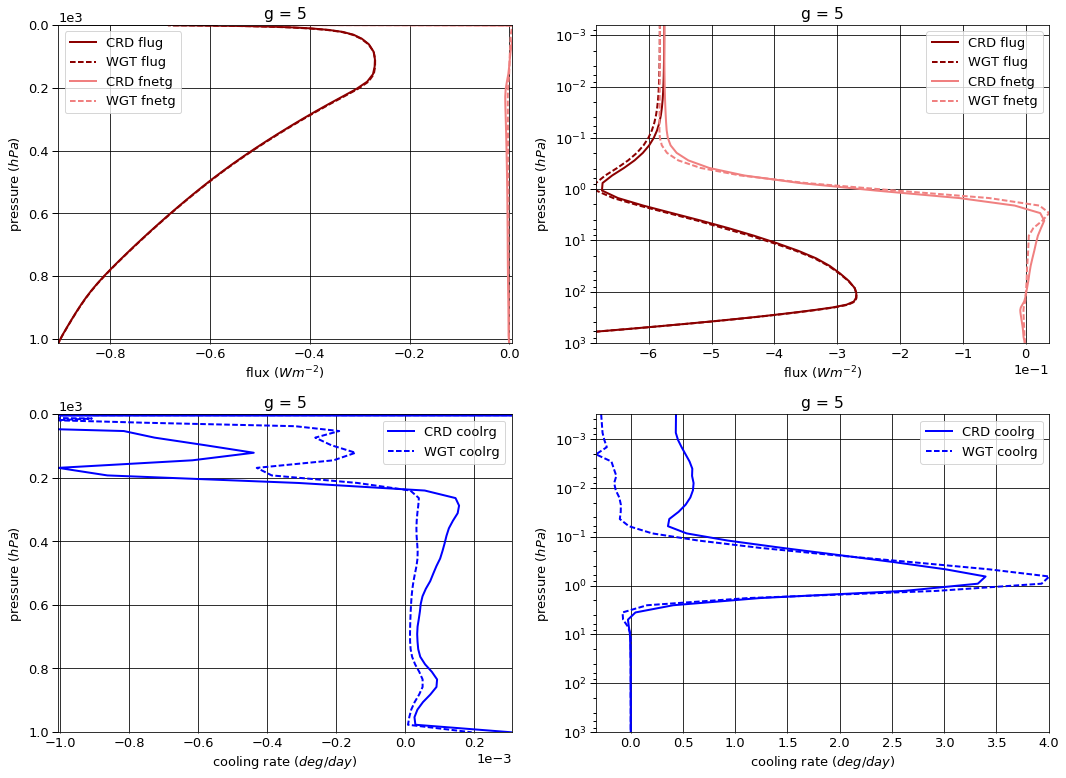

# Figure: flux, cooling rate g-group 6

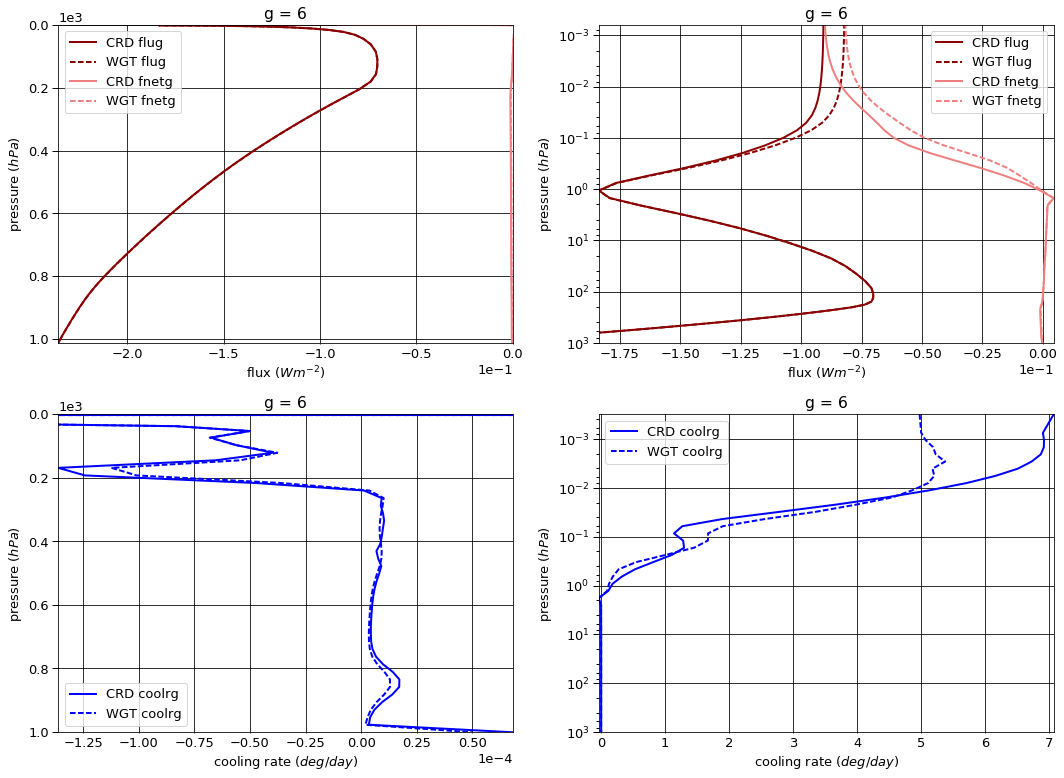

# Figure: flux, cooling rate g-group 7

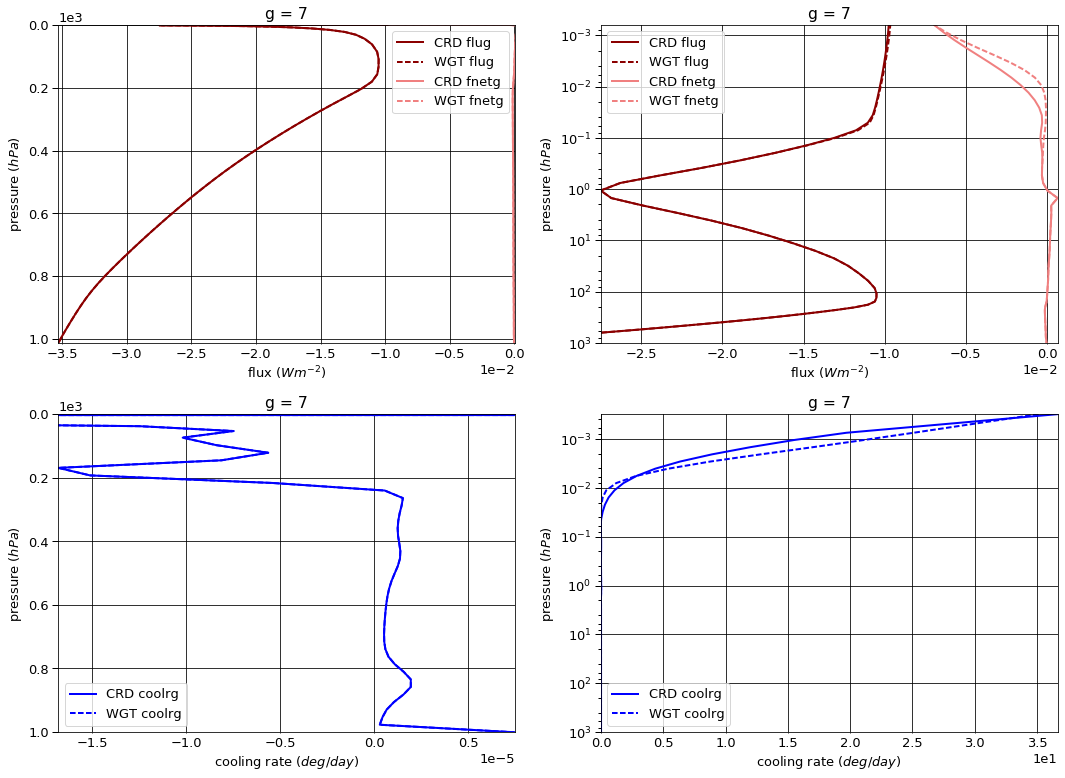

# Figure: flux, cooling rate g-group total

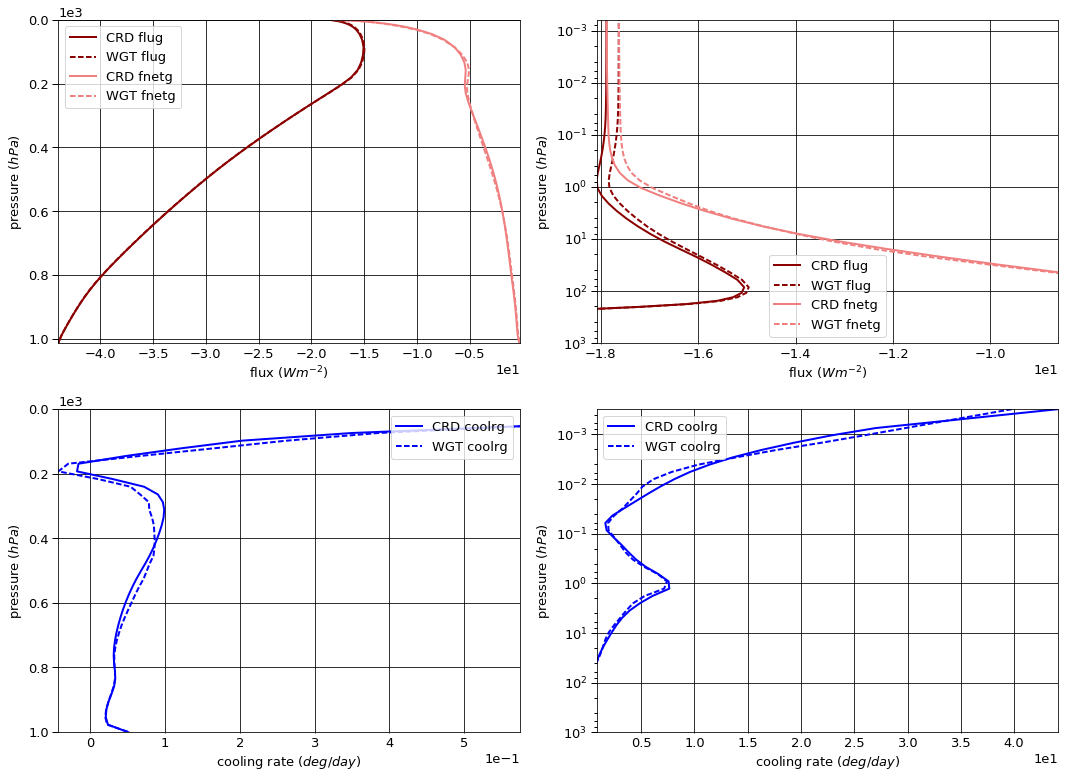

In [17]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [18]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug       fldg     fnetg
g pressure level                                
1 0.0      1      -3.953541   0.000000 -3.953541
  1013.0   76     -8.386956   8.162037 -0.224919
2 0.0      1      -7.064014   0.000000 -7.064014
  1013.0   76    -20.697632  20.633799 -0.063833
3 0.0      1      -4.482334   0.000000 -4.482334
  1013.0   76    -10.780553  10.762345 -0.018208
4 0.0      1      -1.709142   0.000000 -1.709142
  1013.0   76     -2.925008   2.920848 -0.004159
5 0.0      1      -0.575157   0.000000 -0.575157
  1013.0   76     -0.903647   0.902751 -0.000896
6 0.0      1      -0.090681   0.000000 -0.090681
  1013.0   76     -0.235762   0.235570 -0.000192
7 0.0      1      -0.009666   0.000000 -0.009666
  1013.0   76     -0.035280   0.035260 -0.000021


WGT


flug       fldg     fnetg
g pressure level                                
1 0.0      1      -4.135304   0.000000 -4.135304
  1013.0   76     -8.386956   8.202822 -0.184134
2 0.0      1      -6.750400   0.000000 -6.750400
  1013.0   76    -20.697632  20.633906 -0.063726
3 0.0      1      -4.339656   0.000000 -4.339656
  1013.0   76    -10.780553  10.774191 -0.006361
4 0.0      1      -1.731730   0.000000 -1.731730
  1013.0   76     -2.925008   2.923283 -0.001724
5 0.0      1      -0.582129   0.000000 -0.582129
  1013.0   76     -0.903647   0.903114 -0.000533
6 0.0      1      -0.082055   0.000000 -0.082055
  1013.0   76     -0.235762   0.235623 -0.000139
7 0.0      1      -0.009556   0.000000 -0.009556
  1013.0   76     -0.035280   0.035260 -0.000021


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1     -0.181764  0.000000 -0.181764
  1013.0   76     0.000000  0.040785  0.040785
2 0.0      1      0.313614  0.000000  0.313614
  1013.0   76     0.000000  0.000107  0.000107
3 0.0      1      0.142677  0.000000  0.142677
  1013.0   76     0.000000  0.011846  0.011847
4 0.0      1     -0.022588  0.000000 -0.022588
  1013.0   76     0.000000  0.002435  0.002435
5 0.0      1     -0.006971  0.000000 -0.006971
  1013.0   76     0.000000  0.000363  0.000363
6 0.0      1      0.008625  0.000000  0.008625
  1013.0   76     0.000000  0.000053  0.000053
7 0.0      1      0.000110  0.000000  0.000110
  1013.0   76     0.000000  0.000000  0.000000

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer           
1 0.000312    1       0.000012
  1001.112500 75      0.025966
2 0.000312    1       0.000219
  1001.112500 75      0.018287
3 0.000312    1       0.004981
  1001.112500 75      0.005036
4 0.000312    1      -0.036777
  1001.112500 75      0.001224
5 0.000312    1       0.433387
  1001.112500 75      0.000308
6 0.000312    1       7.073837
  1001.112500 75      0.000069
7 0.000312    1      36.662098
  1001.112500 75      0.000008


WGT


coolrg
g pressure    layer           
1 0.000312    1       0.000010
  1001.112500 75      0.026714
2 0.000312    1       0.000236
  1001.112500 75      0.022196
3 0.000312    1       0.002844
  1001.112500 75      0.002293
4 0.000312    1      -0.033119
  1001.112500 75      0.000622
5 0.000312    1      -0.282904
  1001.112500 75      0.000192
6 0.000312    1       4.976802
  1001.112500 75      0.000050
7 0.000312    1      35.136286
  1001.112500 75      0.000008


WGT - CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000001
  1001.112500 75     0.000748
2 0.000312    1      0.000018
  1001.112500 75     0.003909
3 0.000312    1     -0.002137
  1001.112500 75    -0.002743
4 0.000312    1      0.003658
  1001.112500 75    -0.000603
5 0.000312    1     -0.716291
  1001.112500 75    -0.000116
6 0.000312    1     -2.097034
  1001.112500 75    -0.000018
7 0.000312    1     -1.525812
  1001.112500 75     0.000000

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-17.884534,0.00000,-17.884534
1013.0,76,-43.964838,43.65261,-0.312228



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-17.630830,0.000000,-17.630830
1013.0,76,-43.964838,43.708199,-0.256638



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.253704,0.000000,0.253704
1013.0,76,0.000000,0.055588,0.055589


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,44.137756
1001.112500,75,0.050897



WGT


,,coolrg
pressure,layer,
0.000312,1,39.800156
1001.112500,75,0.052074



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-4.337600
1001.112500,75,0.001177


In [19]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.19175,0.190211
2,0.47055,0.470883
3,0.24470,0.245503
4,0.06635,0.066649
5,0.02050,0.020583
6,0.00535,0.005369
7,0.00080,0.000804


In [20]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,3.056898e-24
2,5.656349e-23
3,1.047746e-22
4,1.939749e-21
5,3.591161e-20
6,6.648507e-19
7,1.230874e-17


In [21]:
def spreadsheet():
    ng = 7
    ng_refs = [5, 2]
    p_refs = [1, 10]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom.loc[3:ng] / df_abscom_copy.loc[3:ng]
    df_absratio.columns = ['k(ig+1)/k(ig)']

    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref[::-1], 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [22]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig+1)/k(ig),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,3.056898e-24,NaN,0.19175,0.190211,0.19175,0.190211,10.0
2,5.656349e-23,NaN,0.47055,0.470883,0.66230,0.661094,10.0
3,1.047746e-22,1.852337,0.24470,0.245503,0.90700,0.906597,1.0
4,1.939749e-21,18.513534,0.06635,0.066649,0.97335,0.973245,1.0
5,3.591161e-20,18.513533,0.02050,0.020583,0.99385,0.993828,1.0
6,6.648507e-19,18.513534,0.00535,0.005369,0.99920,0.999196,1.0
7,1.230874e-17,18.513534,0.00080,0.000804,1.00000,1.000000,1.0


In [23]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

In [24]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')